# Online Retail EDA

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Loading the data and getting Familiar with the Data Structure

In [2]:
# Load Data
data = pd.read_csv("online_retail.csv")

# Display the structure of the data
data.info()

# Display a glimpse of the data
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


## Cleaning and Understanding the Data
First thing: handling and expanding the date column

In [3]:
# Convert `InvoiceDate` column to datetime and create new columns
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data['Hour'] = data['InvoiceDate'].dt.hour

data

/var/folders/1b/x4fbz5ws7pnff_1llq5qsw4m0000gp/T/ipykernel_69027/4279848025.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,9,Friday,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,9,Friday,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,9,Friday,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,9,Friday,12


### Orders Summary

In [4]:
# Display summary statistics for orders
data.groupby('InvoiceNo').agg(
    items=('Quantity', 'size'),
    avg_item=('UnitPrice', 'mean'),
    Total=('Quantity', lambda x: (x * data.loc[x.index, 'UnitPrice']).sum())
).sort_values(by='Total')

,items,avg_item,Total
InvoiceNo,,,
C581484,1,2.080000,-168469.60
C541433,1,1.040000,-77183.60
C556445,1,38970.000000,-38970.00
C550456,5,3.160000,-22998.40
C580605,1,17836.460000,-17836.46
...,...,...,...
556444,1,649.500000,38970.00
576365,99,4.742525,50653.91
574941,101,4.939505,52940.94


### Orders by Customer:

In [5]:
# Display summary statistics for orders by customer
data.groupby('CustomerID').agg(
    orders=('InvoiceNo', 'size'),
    avg_order=('Quantity', lambda x: (x * data.loc[x.index, 'UnitPrice']).mean()),
    Total=('Quantity', lambda x: (x * data.loc[x.index, 'UnitPrice']).sum())
).sort_values(by='Total')

,orders,avg_order,Total
CustomerID,,,
17448.0,1,-4287.630000,-4287.63
15369.0,1,-1592.490000,-1592.49
14213.0,5,-238.440000,-1192.20
17603.0,15,-77.686667,-1165.30
12503.0,1,-1126.000000,-1126.00
...,...,...,...
12415.0,778,159.030141,123725.45
14911.0,5903,22.458516,132572.62
17450.0,351,534.137236,187482.17


### Orders by Country:

In [6]:
# Display summary statistics for orders by country
data.groupby('Country').agg(
    orders=('InvoiceNo', 'size'),
    avg_order=('Quantity', lambda x: (x * data.loc[x.index, 'UnitPrice']).mean()),
    Total=('Quantity', lambda x: (x * data.loc[x.index, 'UnitPrice']).sum())
).sort_values(by='Total')

,orders,avg_order,Total
Country,,,
Saudi Arabia,10,13.117000,131.170
Bahrain,19,28.863158,548.400
Czech Republic,30,23.590667,707.720
RSA,58,17.281207,1002.310
Brazil,32,35.737500,1143.600
European Community,61,21.176230,1291.750
Lithuania,35,47.458857,1661.060
Lebanon,45,37.641778,1693.880
USA,291,5.948179,1730.920


### The period covered in the data:

In [7]:
agg_data = data.agg(
    start=('InvoiceDate', 'min'),
    end=('InvoiceDate', 'max')
)

agg_data.loc['period'] = agg_data.loc['end'] - agg_data.loc['start']
agg_data = agg_data.rename(index={'start': 'StartDate', 'end': 'EndDate'},columns={'InvoiceDate': 'Dates'})

agg_data

,Dates
StartDate,2010-12-01 08:26:00
EndDate,2011-12-09 12:50:00
period,373 days 04:24:00


### Takeaway notes from first look at the data:
- Some total prices are negative.
- The `InvoiceNo` foramt is not consistent.

## Investigating Peculuarities
### Negative totals
For a total price to be negative, either the `Quantity` or the `UnitPrice` column is negative. And the reason why it is negative could be discounts, returns, cancellations, damages… etc.

In [8]:
# Negative totals due to negative quantity
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,12,1,Wednesday,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,12,1,Wednesday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,12,1,Wednesday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,1,Wednesday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,1,Wednesday,10
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,12,9,Friday,9
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,12,9,Friday,10
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,12,9,Friday,11
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,12,9,Friday,11


In the description column, some of these entries are described “Discount” and others just have the full product description. So, my earlier guess about discounts, returns, cancellations, or damages could be true.

In [9]:
# Negative totals due to negative UnitPrice
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,8,12,Friday,14
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,8,12,Friday,14


Two invoices descibed as “Adjust bad debt”, these should be removed before analyzing the sales.

### About those discounts
Discounts naturally should be related to a specific sale, you don’t give discounts on something unless you sell it, and naturally there should be a customer who benefited from the discounts.
So, let's verify that these discounts are associated with customers

In [10]:
# Verifying discounts by displaying all the rows that are marked as Discounts and have no CustomerID. Expected outcome is empty table
data[(data['StockCode'] == 'D') & (data['CustomerID'].isna())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour


Discounts are verified. Now, let’s isolate them into a seperate table to further analyse them later.

In [11]:
# Create discounts variable
discounts = data[data['StockCode'] == 'D']
discounts

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,12,1,Wednesday,9
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,12,5,Sunday,13
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,12,7,Tuesday,12
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,12,8,Wednesday,16
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,12,15,Wednesday,9
...,...,...,...,...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom,11,18,Friday,12
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom,11,18,Friday,12
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy,11,23,Wednesday,12
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom,11,30,Wednesday,17


## Using `StockCode`

Seeing that the transactions with description "Discount" all have a Stockcode "D", it looks like this colunn is more likely to be the key to understand this dataset instead of going through tons of descriptions. First we need to differentiate between the StockCodes referring to real products in stock and StockCodes referring to something else. Let's look at the format of all StockCodes by seeing how many different lengths do they come in:

In [12]:
# Investigate StockCode lengths
data['StockCode'].str.len().value_counts().to_frame().reset_index().rename(columns={'StockCode': 'StockCodeLength'})

,StockCodeLength,count
0,5,487036
1,6,51488
2,4,1276
3,1,715
4,3,710
5,7,390
6,2,144
7,12,71
8,9,48
9,8,31


The majority as we see are 5 or 6 characters long, but we've got lots of different lengths. Let's look at them and see if we can isolate any differnt kinds of transactions like we did with Discounts.

### One Letter codes

In [13]:
# Investigate one letter codes
pd.DataFrame(data[data['StockCode'].str.len() == 1]['StockCode'].unique())

,0
0,D
1,M
2,S
3,m
4,B


We find 4 (or maybe 5) different 1 character StockCode, we were introduced to "D" earlier, now let's look at this piculiar M and m, are they the same thing?

In [14]:
# Investigate M and m codes
m_codes = data[data['StockCode'].isin(['M', 'm'])].groupby('StockCode').agg(
    count=('StockCode', 'size'), # Getting the number of instances, and the total amount of each one
    total=('Quantity', lambda x: (x * data.loc[x.index, 'UnitPrice']).sum())
)
m_codes

,count,total
StockCode,,
M,571,-68674.19
m,1,2.55


In [15]:
# Looking at this single row with StockCode "m"  
data[data['StockCode'] == 'm'] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
40383,539736,m,Manual,1,2010-12-21 15:18:00,2.55,NaN,United Kingdom,12,21,Tuesday,15


In [16]:
# Looking at the "M"
data[data['StockCode'] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,12,1,Wednesday,15
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,12,1,Wednesday,15
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom,12,3,Friday,11
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom,12,3,Friday,14
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom,12,5,Sunday,11
...,...,...,...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom,12,6,Tuesday,14
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom,12,7,Wednesday,9
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom,12,7,Wednesday,13
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom,12,8,Thursday,13


So, they are the same thing, they all have a description "Manual", but what does it mean? Is it manual as in manual labor, or manuals of devices sold separately? I can’t tell because some of them have a negative cost and others positive.

Now, moving the "S":

In [17]:
# Investigate S code
s_code = data[data['StockCode'] == 'S']
s_code

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
14436,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,12.95,NaN,United Kingdom,12,7,Tuesday,12
14437,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,52.00,NaN,United Kingdom,12,7,Tuesday,12
96680,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.74,NaN,United Kingdom,2,21,Monday,14
96681,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,11.08,NaN,United Kingdom,2,21,Monday,14
96682,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.79,NaN,United Kingdom,2,21,Monday,14
...,...,...,...,...,...,...,...,...,...,...,...,...
414147,C572347,S,SAMPLES,-1,2011-10-24 11:03:00,33.05,NaN,United Kingdom,10,24,Monday,11
419666,572849,S,SAMPLES,1,2011-10-26 12:20:00,33.05,NaN,United Kingdom,10,26,Wednesday,12
480961,C577330,S,SAMPLES,-1,2011-11-18 14:16:00,2.89,NaN,United Kingdom,11,18,Friday,14
480962,C577330,S,SAMPLES,-1,2011-11-18 14:16:00,75.00,NaN,United Kingdom,11,18,Friday,14


Descirption says samples, let’s just make sure they’re samples given away:

In [18]:
# Verify samples, are all of them negative costs (samples given away)?
data[(data['StockCode'] == 'S') & (data['Quantity'] * data['UnitPrice'] >= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
152709,549684,S,SAMPLES,1,2011-04-11 13:24:00,30.00,NaN,United Kingdom,4,11,Monday,13
419666,572849,S,SAMPLES,1,2011-10-26 12:20:00,33.05,NaN,United Kingdom,10,26,Wednesday,12


Just two curious invoices marked as samples but are positive revenue.

Last one of the one letter group, What is B?

In [19]:
# Investigate B code
b_code = data[data['StockCode'] == 'B']
b_code

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,8,12,Friday,14
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,8,12,Friday,14
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,8,12,Friday,14


Adjusting bad debt. Alright

### Two-Letters codes

In [20]:
# Unique Stock codes of length 2
data[data['StockCode'].str.len() == 2]['StockCode'].unique()

array(['C2'], dtype=object)

In [21]:
# Investigate two letters codes
two_letters_codes = data[data['StockCode'].str.len() == 2]
two_letters_codes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911.0,EIRE,12,1,Wednesday,14
12119,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911.0,EIRE,12,6,Monday,12
12452,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911.0,EIRE,12,6,Monday,13
19975,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom,12,9,Thursday,11
20016,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.0,14932.0,Channel Islands,12,9,Thursday,11
...,...,...,...,...,...,...,...,...,...,...,...,...
515000,579768,C2,CARRIAGE,1,2011-11-30 15:08:00,50.0,14911.0,EIRE,11,30,Wednesday,15
516484,579910,C2,CARRIAGE,1,2011-12-01 08:52:00,50.0,14911.0,EIRE,12,1,Thursday,8
518854,580124,C2,CARRIAGE,1,2011-12-01 17:12:00,50.0,NaN,EIRE,12,1,Thursday,17
518905,580127,C2,CARRIAGE,1,2011-12-01 17:51:00,50.0,14911.0,EIRE,12,1,Thursday,17


Some revenue described as Carriage. I don’t think it means the product carriage. 

### Three-letters codes

In [22]:
# Unique Stock codes of length 3
data[data['StockCode'].str.len() == 3]['StockCode'].unique()

array(['DOT'], dtype=object)

In [23]:
# Investigate three letters codes
three_letters_codes = data[data['StockCode'].str.len() == 3]
three_letters_codes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,12,1,Wednesday,14
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,12,1,Wednesday,17
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,12,3,Friday,11
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,12,3,Friday,11
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,12,3,Friday,11
...,...,...,...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,12,8,Thursday,9
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,12,8,Thursday,10
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,12,8,Thursday,16
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,12,9,Friday,10


Described as Dotcom Postage, sounds like an expense but the first rows are all revenue. Let’s see the total:

In [24]:
# Investigate Dotcom postage total
data[data['StockCode'].str.len() == 3].groupby('StockCode').agg(
    total=('Quantity', lambda x: (x * data.loc[x.index, 'UnitPrice']).sum())
)

,total
StockCode,
DOT,206245.48


OVerall revenue, it looks!

### Four-Letters codes

In [25]:
# Investigate four letters codes
data[data['StockCode'].str.len() == 4]['StockCode'].unique()

array(['POST', 'PADS', 'CRUK'], dtype=object)

There are three of them: POST, PADS, CRUK. Checking one by one:

In [26]:
# Investigate POST code
post_code = data[data['StockCode'] == 'POST']
post_code

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France,12,1,Wednesday,8
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands,12,1,Wednesday,11
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany,12,1,Wednesday,13
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany,12,2,Thursday,18
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France,12,3,Friday,9
...,...,...,...,...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423.0,Belgium,12,9,Friday,10
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518.0,Germany,12,9,Friday,10
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662.0,Germany,12,9,Friday,11
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0,Germany,12,9,Friday,12


Described as Postage, also strange seeing the first rows are revenue, let’s check overall:

In [27]:
# Investigate POST overall
data[data['StockCode'] == 'POST'].groupby('StockCode').agg(
    total=('Quantity', lambda x: (x * data.loc[x.index, 'UnitPrice']).sum())
)

,total
StockCode,
POST,66230.64


Also, the overall is revenue. That is strange!

Next, what is PADS?

In [28]:
# Investigate PADS code
pads_code = data[data['StockCode'] == 'PADS']
pads_code

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,4,15,Friday,9
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,7,26,Tuesday,10
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133.0,United Kingdom,9,25,Sunday,12
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,9,25,Sunday,14


The description is a bit strange: Pads to match all cushions! But literally just four entries contributing to less than a cent of revenue. Negligible.

Next, What is CRUK?

In [29]:
# Investigate CRUK code
cruk_code = data[data['StockCode'] == 'CRUK']
cruk_code

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
317508,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom,8,30,Tuesday,10
324023,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom,9,2,Friday,15
333779,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom,9,9,Friday,15
338848,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom,9,13,Tuesday,12
351003,C567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom,9,21,Wednesday,14
361603,C568345,CRUK,CRUK Commission,-1,2011-09-26 15:28:00,447.56,14096.0,United Kingdom,9,26,Monday,15
372785,C569245,CRUK,CRUK Commission,-1,2011-10-03 09:57:00,361.59,14096.0,United Kingdom,10,3,Monday,9
390002,C570487,CRUK,CRUK Commission,-1,2011-10-10 17:12:00,411.92,14096.0,United Kingdom,10,10,Monday,17
401767,C571440,CRUK,CRUK Commission,-1,2011-10-17 13:31:00,495.98,14096.0,United Kingdom,10,17,Monday,13
416464,C572551,CRUK,CRUK Commission,-1,2011-10-24 17:07:00,425.14,14096.0,United Kingdom,10,24,Monday,17


Described as “Cruk commision”. Looks like an expense, making sure:

In [30]:
# Investigate CRUK summary
data[data['StockCode'] == 'CRUK'].groupby('StockCode').agg(
    total=('Quantity', lambda x: (x * data.loc[x.index, 'UnitPrice']).sum())
)

,total
StockCode,
CRUK,-7933.43


Makes sense, but bad practice to just code it in the name of the person.

As stated earlier, 5 and 6 characters long codes comprise the bulk of the data, so they probably correspond to real products, so I’m skipping to 7 letters long codes.

### Seven letters codes

Some of them could still be real product codes

In [31]:
# Investigate seven letters codes
seven_letters_codes = data[data['StockCode'].str.len() == 7]
seven_letters_codes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
132,536381,15056BL,EDWARDIAN PARASOL BLACK,2,2010-12-01 09:41:00,5.95,15311.0,United Kingdom,12,1,Wednesday,9
281,536396,15056BL,EDWARDIAN PARASOL BLACK,6,2010-12-01 10:51:00,4.95,17850.0,United Kingdom,12,1,Wednesday,10
1219,536531,15056BL,EDWARDIAN PARASOL BLACK,12,2010-12-01 13:23:00,5.95,15485.0,United Kingdom,12,1,Wednesday,13
4164,536750,15056BL,EDWARDIAN PARASOL BLACK,6,2010-12-02 14:04:00,4.95,17850.0,United Kingdom,12,2,Thursday,14
4185,536752,15056BL,EDWARDIAN PARASOL BLACK,6,2010-12-02 14:06:00,4.95,17850.0,United Kingdom,12,2,Thursday,14
...,...,...,...,...,...,...,...,...,...,...,...,...
533673,581098,15056BL,EDWARDIAN PARASOL BLACK,6,2011-12-07 11:42:00,5.95,14911.0,EIRE,12,7,Wednesday,11
536407,581219,15056BL,EDWARDIAN PARASOL BLACK,1,2011-12-08 09:28:00,12.46,NaN,United Kingdom,12,8,Thursday,9
536964,581232,15056BL,EDWARDIAN PARASOL BLACK,24,2011-12-08 10:26:00,5.95,12358.0,Austria,12,8,Thursday,10
541223,581495,15056BL,EDWARDIAN PARASOL BLACK,36,2011-12-09 10:20:00,5.95,14051.0,United Kingdom,12,9,Friday,10


In [32]:
# Unique seven letters codes
data[data['StockCode'].str.len() == 7]['Description'].unique()

array(['EDWARDIAN PARASOL BLACK', 'Unsaleable, destroyed.'], dtype=object)

Two unique descriptions, one looks like a regular product, but the other says 'Unsaleable, destroyed.'
Let's isolate those:

In [33]:
destroyed = data[data['Description'] == 'Unsaleable, destroyed.']
destroyed

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
431375,573590,79323G,"Unsaleable, destroyed.",-657,2011-10-31 15:15:00,0.0,NaN,United Kingdom,10,31,Monday,15
431376,573591,79323B,"Unsaleable, destroyed.",-1671,2011-10-31 15:15:00,0.0,NaN,United Kingdom,10,31,Monday,15
431377,573592,79323GR,"Unsaleable, destroyed.",-1158,2011-10-31 15:16:00,0.0,NaN,United Kingdom,10,31,Monday,15
431378,573593,79323LP,"Unsaleable, destroyed.",-2618,2011-10-31 15:16:00,0.0,NaN,United Kingdom,10,31,Monday,15
431379,573594,79323P,"Unsaleable, destroyed.",-2003,2011-10-31 15:16:00,0.0,NaN,United Kingdom,10,31,Monday,15
431380,573595,79323S,"Unsaleable, destroyed.",-674,2011-10-31 15:17:00,0.0,NaN,United Kingdom,10,31,Monday,15
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2011-10-31 15:17:00,0.0,NaN,United Kingdom,10,31,Monday,15
431382,573597,79341,"Unsaleable, destroyed.",-905,2011-10-31 15:18:00,0.0,NaN,United Kingdom,10,31,Monday,15
431383,573598,79342B,"Unsaleable, destroyed.",-1128,2011-10-31 15:18:00,0.0,NaN,United Kingdom,10,31,Monday,15


Not so many rows, but one note is their unit price are all 0 meaning they contribute nothing to the balance sheet when they should contribute a negative value

### Eight-Letters codes

In [34]:
# Investigate eight letters codes
data[data['StockCode'].str.len() == 8]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
21326,538071,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-12-09 14:09:00,16.13,NaN,United Kingdom,12,9,Thursday,14
24906,538349,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-10 14:59:00,2.51,NaN,United Kingdom,12,10,Friday,14
36460,539451,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-17 16:59:00,2.51,NaN,United Kingdom,12,17,Friday,16
39313,539631,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2,2010-12-20 15:03:00,16.13,NaN,United Kingdom,12,20,Monday,15
40052,539718,DCGS0070,CAMOUFLAGE DOG COLLAR,1,2010-12-21 13:06:00,12.72,NaN,United Kingdom,12,21,Tuesday,13
74825,542529,DCGS0055,NaN,-1,2011-01-28 13:08:00,0.00,NaN,United Kingdom,1,28,Friday,13
74838,542531,DCGS0072,NaN,-1,2011-01-28 13:08:00,0.00,NaN,United Kingdom,1,28,Friday,13
74839,542532,DCGS0074,NaN,-1,2011-01-28 13:09:00,0.00,NaN,United Kingdom,1,28,Friday,13
75053,542541,DCGS0069,OOH LA LA DOGS COLLAR,1,2011-01-28 14:25:00,15.79,NaN,United Kingdom,1,28,Friday,14
75295,542582,DCGS0057,NaN,-6,2011-01-28 15:01:00,0.00,NaN,United Kingdom,1,28,Friday,15


In [35]:
data[data['StockCode'].str.len() == 8]['Description'].unique()

array(['SUNJAR LED NIGHT NIGHT LIGHT', 'BOXED GLASS ASHTRAY',
       'CAMOUFLAGE DOG COLLAR', nan, 'OOH LA LA DOGS COLLAR',
       'BOYS PARTY BAG', 'HAYNES CAMPER SHOULDER BAG', 'ebay'],
      dtype=object)

They look like regular products

### Nine-Letters codes

In [36]:
# Investigate nine letters codes
data[data['StockCode'].str.len() == 9]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom,12,7,Tuesday,12
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,12,7,Tuesday,15
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,12,7,Tuesday,15
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,12,7,Tuesday,15
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom,12,7,Tuesday,15
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,12,7,Tuesday,15
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom,12,7,Tuesday,15
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,1,5,Wednesday,9
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,1,5,Wednesday,9
84017,543358,DCGSSGIRL,GIRLS PARTY BAG,3,2011-02-07 14:04:00,3.29,NaN,United Kingdom,2,7,Monday,14


In [37]:
# Investigate nine letters codes
data[data['StockCode'].str.len() == 9]['Description'].unique()

array(['AMAZON FEE', 'GIRLS PARTY BAG', nan], dtype=object)

We can see that one is Amazon fees. This should be an expense, let's see:

In [38]:
# Investigate amazon fees
data[data['StockCode'] == 'AMAZONFEE'].groupby('StockCode').agg(
    count=('StockCode', 'size'),
    total=('Quantity', lambda x: (x * data.loc[x.index, 'UnitPrice']).sum())
)

,count,total
StockCode,,
AMAZONFEE,34,-221520.5


Correct, expenses.

### Twelve-letters codes

In [39]:
# Investigate twelve letters codes
data[data['StockCode'].str.len() == 12]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.0,United Kingdom,12,2,Thursday,15
14435,C537572,BANK CHARGES,Bank Charges,-1,2010-12-07 12:00:00,95.38,NaN,United Kingdom,12,7,Tuesday,12
28992,C538680,BANK CHARGES,Bank Charges,-1,2010-12-13 17:10:00,966.92,NaN,United Kingdom,12,13,Monday,17
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-12-20 10:14:00,34.04,NaN,United Kingdom,12,20,Monday,10
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2010-12-23 13:26:00,42.55,NaN,United Kingdom,12,23,Thursday,13
...,...,...,...,...,...,...,...,...,...,...,...,...
481152,C577342,BANK CHARGES,Bank Charges,-1,2011-11-18 15:11:00,490.06,NaN,United Kingdom,11,18,Friday,15
481153,C577343,BANK CHARGES,Bank Charges,-1,2011-11-18 15:13:00,27.21,NaN,United Kingdom,11,18,Friday,15
506357,579137,BANK CHARGES,Bank Charges,1,2011-11-28 12:51:00,15.00,14704.0,United Kingdom,11,28,Monday,12
534008,581127,BANK CHARGES,Bank Charges,1,2011-12-07 12:45:00,15.00,16271.0,United Kingdom,12,7,Wednesday,12


In [ ]:
# Unique twelve letters codes
data[data['StockCode'].str.len() == 12]['StockCode'].unique()

array(['BANK CHARGES', 'gift_0001_40', 'gift_0001_50', 'gift_0001_30',
       'gift_0001_20', 'gift_0001_10'], dtype=object)

Bank charges and gifts, expected to be expenses, making sure:

In [42]:
# Verifying twelve letters codes
data[data['StockCode'].str.len() == 12].groupby('StockCode').agg(
    count=('StockCode', 'size'),
    total=('Quantity', lambda x: (x * data.loc[x.index, 'UnitPrice']).sum())
)

,count,total
StockCode,,
BANK CHARGES,37,-7175.639
gift_0001_10,9,74.970
gift_0001_20,10,167.050
gift_0001_30,8,175.530
gift_0001_40,3,100.700
gift_0001_50,4,167.560


The bank charges are expenses alright, but the gifts are revenue, meaning they’re received gifts.

There are no invoices marked as returns, so, either there were never any returned items, or they are entered some other way.

Creating a list of non-product codes for easy filtering:

In [43]:
# Create non-product codes list
non_product_codes = ["D", "M", "m", "B", "S", "C2", "DOT", "POST", "PADS", "CRUK", "AMAZONFEE", "BANK CHARGES", "gift_0001_40", "gift_0001_50", "gift_0001_30", "gift_0001_20", "gift_0001_10"]

## Zero Money

While checking these codes, I encountered some invoices that had Quantity or Unitprice as 0, meaning, they do not contribute to any money at all. Let’s see how many are those:

In [44]:
# Investigate zero money entries
zero_money_entries = data[data['Quantity'] * data['UnitPrice'] == 0]
zero_money_entries

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,12,1,Wednesday,11
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,12,1,Wednesday,14
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,12,1,Wednesday,14
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,12,1,Wednesday,14
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,12,1,Wednesday,14
...,...,...,...,...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,12,8,Thursday,10
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom,12,8,Thursday,13
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom,12,8,Thursday,13
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom,12,8,Thursday,14


That is a lot. Let’s save them and remove them from the data:

In [45]:
# Filter out zero money entries
data = data[data['Quantity'] * data['UnitPrice'] != 0]

## Unaccounted for negative entries

Now, let’s see if there are still some negative sum transactions after filtering out non product stock codes:

In [46]:
# Investigate unaccounted for negative entries
unaccounted_negative_entries = data[~data['StockCode'].isin(non_product_codes) & (data['Quantity'] * data['UnitPrice'] < 0)]
unaccounted_negative_entries

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,12,1,Wednesday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,12,1,Wednesday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,1,Wednesday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,1,Wednesday,10
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,1,Wednesday,10
...,...,...,...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,12,9,Friday,9
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,12,9,Friday,9
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,12,9,Friday,11
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,12,9,Friday,11


There are still a lot. Since these are not marked as discounts, samples, or giveaways, they probably are returns or damaged inventory.

### Losses

If an item was damaged while in inventory, it would be logical to not find any customer Id associated with it, and to enter it in the database as an expense. So, I’ll filter these and save them as losses

In [47]:
# Create losses variable
losses = data[~data['StockCode'].isin(non_product_codes) & (data['Quantity'] * data['UnitPrice'] < 0) & data['CustomerID'].isna()]
losses

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
11502,C537251,22429,ENAMEL MEASURING JUG CREAM,-2,2010-12-06 10:45:00,4.25,NaN,United Kingdom,12,6,Monday,10
11503,C537251,22620,4 TRADITIONAL SPINNING TOPS,-8,2010-12-06 10:45:00,1.25,NaN,United Kingdom,12,6,Monday,10
11504,C537251,21890,S/6 WOODEN SKITTLES IN COTTON BAG,-2,2010-12-06 10:45:00,2.95,NaN,United Kingdom,12,6,Monday,10
11505,C537251,22564,ALPHABET STENCIL CRAFT,-5,2010-12-06 10:45:00,1.25,NaN,United Kingdom,12,6,Monday,10
11506,C537251,21891,TRADITIONAL WOODEN SKIPPING ROPE,-3,2010-12-06 10:45:00,1.25,NaN,United Kingdom,12,6,Monday,10
...,...,...,...,...,...,...,...,...,...,...,...,...
492205,C578097,22835,HOT WATER BOTTLE I AM SO POORLY,-48,2011-11-22 17:31:00,4.25,NaN,United Kingdom,11,22,Tuesday,17
492206,C578097,22114,HOT WATER BOTTLE TEA AND SYMPATHY,-48,2011-11-22 17:31:00,3.75,NaN,United Kingdom,11,22,Tuesday,17
492207,C578097,22112,CHOCOLATE HOT WATER BOTTLE,-48,2011-11-22 17:31:00,4.25,NaN,United Kingdom,11,22,Tuesday,17
514984,C579757,47469,ASSORTED SHAPES PHOTO CLIP SILVER,-24,2011-11-30 14:56:00,0.65,NaN,United Kingdom,11,30,Wednesday,14


### Returns

That leaves some negative cost invoices that have customer Ids and are not discounts. These are probably returns.

In [48]:
# Create returns variable
returns = data[~data['StockCode'].isin(non_product_codes) & (data['Quantity'] * data['UnitPrice'] < 0) & ~data['CustomerID'].isna()]
returns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,12,1,Wednesday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,12,1,Wednesday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,1,Wednesday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,1,Wednesday,10
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,1,Wednesday,10
...,...,...,...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,12,9,Friday,9
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,12,9,Friday,9
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,12,9,Friday,11
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,12,9,Friday,11


### Sales

Now, finally, let’s isolate the sales by excluding the zero money items, discounts, losses, and returns:

In [50]:
# Create sales variable
sales = data[~data['StockCode'].isin(non_product_codes)]
sales = sales[~sales.index.isin(zero_money_entries.index)]
sales = sales[~sales.index.isin(returns.index)]
sales = sales[~sales.index.isin(losses.index)]
sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,9,Friday,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,9,Friday,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,9,Friday,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,9,Friday,12


## Analysis

### Sales

Top 10 orders:

In [56]:
# Calculate total revenue for each InvoiceNo
invoice_totals = sales.groupby('InvoiceNo').agg(total=('Quantity', lambda x: (x * sales.loc[x.index, 'UnitPrice']).sum()))

# Get the top 10 InvoiceNos by total revenue
top_10_invoices = invoice_totals.sort_values(by='total', ascending=False).head(10).reset_index()

# Merge the top 10 invoices with the original sales data to include the total column
top_10_orders_revenue = sales.merge(top_10_invoices, on='InvoiceNo').head(10)

top_10_orders_revenue

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,DayOfWeek,Hour,total
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,1,18,Tuesday,10,77183.60
1,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,6,10,Friday,15,38970.00
2,556917,21992,VINTAGE PAISLEY STATIONERY SET,12,2011-06-15 13:37:00,1.25,12415.0,Australia,6,15,Wednesday,13,22775.93
3,556917,21993,FLORAL FOLK STATIONERY SET,60,2011-06-15 13:37:00,1.25,12415.0,Australia,6,15,Wednesday,13,22775.93
4,556917,21933,PINK VINTAGE PAISLEY PICNIC BAG,100,2011-06-15 13:37:00,1.65,12415.0,Australia,6,15,Wednesday,13,22775.93
5,556917,21990,MODERN FLORAL STATIONERY SET,72,2011-06-15 13:37:00,1.25,12415.0,Australia,6,15,Wednesday,13,22775.93
6,556917,84944,SET OF 6 KASHMIR FOLKART BAUBLES,60,2011-06-15 13:37:00,1.65,12415.0,Australia,6,15,Wednesday,13,22775.93
7,556917,21929,JUMBO BAG PINK VINTAGE PAISLEY,100,2011-06-15 13:37:00,1.79,12415.0,Australia,6,15,Wednesday,13,22775.93
8,556917,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,2011-06-15 13:37:00,1.04,12415.0,Australia,6,15,Wednesday,13,22775.93
9,556917,23167,SMALL CERAMIC TOP STORAGE JAR,96,2011-06-15 13:37:00,0.69,12415.0,Australia,6,15,Wednesday,13,22775.93


Top 10 customers:

In [57]:
# Top 10 customers
top_10_customers = sales.groupby('CustomerID').agg(
    total=('Quantity', lambda x: (x * sales.loc[x.index, 'UnitPrice']).sum()),
    orders=('InvoiceNo', 'nunique')
).sort_values(by=['total', 'orders'], ascending=False).head(10)
top_10_customers

,total,orders
CustomerID,,
14646.0,279138.02,72
18102.0,259657.30,60
17450.0,194550.79,46
16446.0,168472.50,2
14911.0,136275.72,198
12415.0,124564.53,20
14156.0,116729.63,54
17511.0,91062.38,31
12346.0,77183.60,1


Since this is online retails, let’s check the distribution of sales across the day:

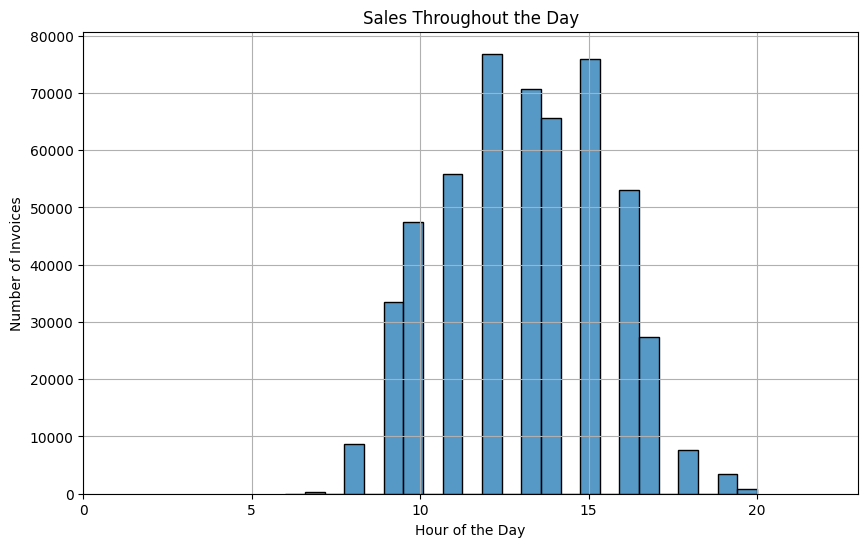

In [58]:
# Sales throughout the day
plt.figure(figsize=(10, 6))
sns.histplot(sales['Hour'], bins=24, kde=False)
plt.title('Sales Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Invoices')
plt.xlim(0, 23)
plt.grid(True)
plt.show()

Looks like most invoices get processed during the middle of the day.

And through the week:

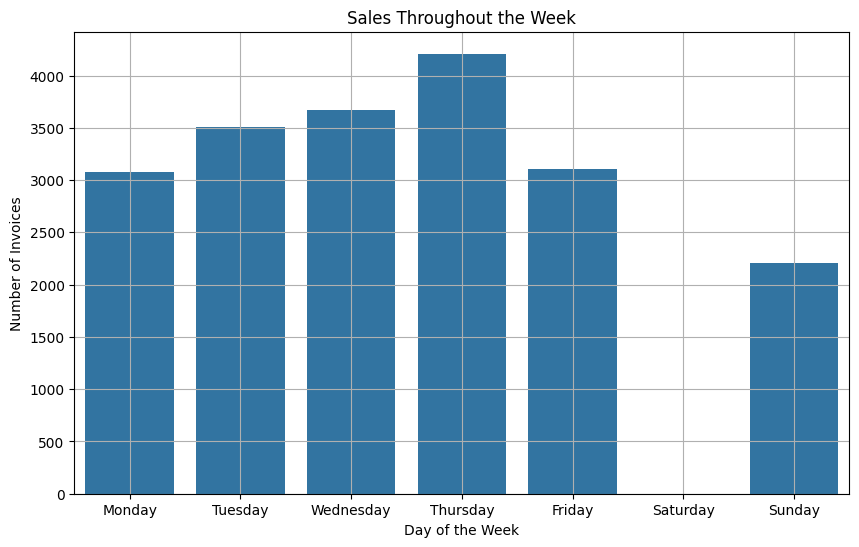

In [59]:
# Sales throughout the week
sales_by_dayofweek = sales.groupby('DayOfWeek').agg(orders=('InvoiceNo', 'nunique')).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='orders', data=sales_by_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales Throughout the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Invoices')
plt.grid(True)
plt.show()

Orders are evenly distributed across workdays, there’s a dip on Sunday, and no orders on Saturday.

What about the sales trend through the year?

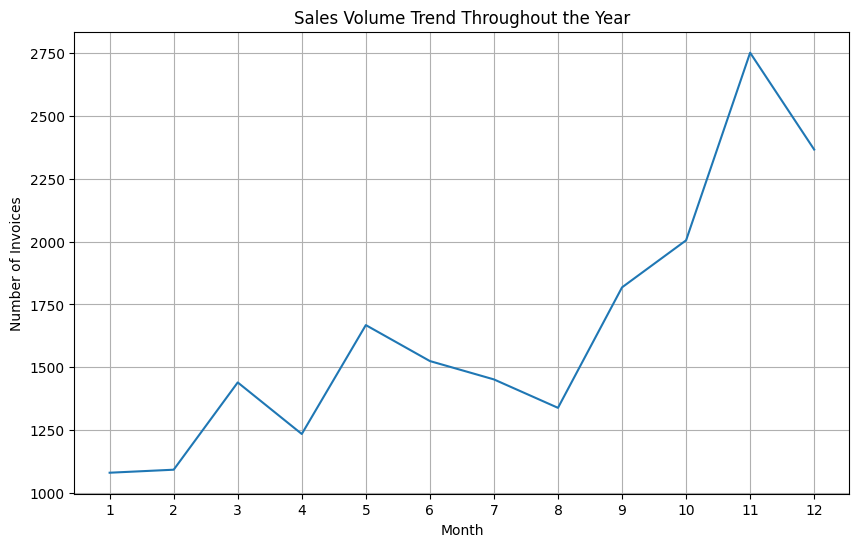

In [60]:
# Sales volume trend throughout the year
sales_volume_trend = sales.groupby('Month').agg(orders=('InvoiceNo', 'nunique')).reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='orders', data=sales_volume_trend)
plt.title('Sales Volume Trend Throughout the Year')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.xticks(ticks=np.arange(1, 13, 1))
plt.grid(True)
plt.show()

Sales started soaring in volume in September. But was that reflected in revenue?

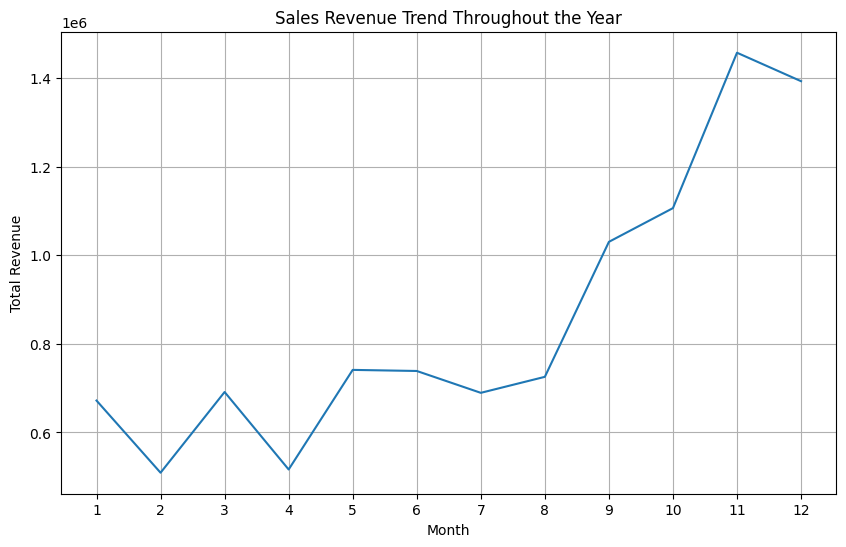

In [61]:
# Sales revenue trend throughout the year
sales_revenue_trend = sales.groupby('Month').agg(total=('Quantity', lambda x: (x * sales.loc[x.index, 'UnitPrice']).sum())).reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='total', data=sales_revenue_trend)
plt.title('Sales Revenue Trend Throughout the Year')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(ticks=np.arange(1, 13, 1))
plt.grid(True)
plt.show()

Yes, the same trend.

### Discounts

First note from understanding the data, the number of discounts is so small that it looks like the store doesn’t give discounts at all. Here’s the distribution on days:

In [62]:
discounts_summary = (discounts
                     .groupby('InvoiceDate')
                     .size()
                     .reset_index(name='count')
                     .sort_values(by='count', ascending=False))

discounts_summary

,InvoiceDate,count
61,2011-11-18 12:06:00,4
44,2011-08-30 11:45:00,4
57,2011-11-03 12:39:00,3
45,2011-08-31 12:29:00,2
55,2011-10-06 12:37:00,2
...,...,...
27,2011-06-06 10:19:00,1
28,2011-06-08 12:37:00,1
29,2011-06-09 19:24:00,1
30,2011-06-14 14:40:00,1


There are no special days for discounts. The day with the highest number of discounts have 4 discounts!

### Returns

Are there any problematic products that customers tend to return a lot? Let’s see the rate of return for products that have been sold a lot (more than 100 times) and returned, to see if there is any product that gets returned a lot.

In [63]:
# Filter out non-product codes and create 'state' column
filtered_data = data[~data['StockCode'].isin(non_product_codes)]
filtered_data = filtered_data.assign(state=lambda x: np.where(x['Quantity'] * x['UnitPrice'] > 0, "POSITIVE", "NEGATIVE"))

# Group by StockCode and state, and count occurrences for POSITIVE state
positive_counts = (filtered_data[filtered_data['state'] == "POSITIVE"]
                   .groupby(['StockCode', 'state'])
                   .size()
                   .reset_index(name='n'))

# Filter positive counts with n > 100
positive_counts = positive_counts[positive_counts['n'] > 100]

# Group by StockCode and state, and count occurrences for NEGATIVE state
negative_counts = (filtered_data[filtered_data['state'] == "NEGATIVE"]
                   .groupby(['StockCode', 'state'])
                   .size()
                   .reset_index(name='n'))

# Merge positive and negative counts on StockCode
merged_counts = positive_counts.merge(negative_counts, on='StockCode', suffixes=('_positive', '_negative'))

# Calculate percentage returned and sort by it
merged_counts['percentage_returned'] = (merged_counts['n_negative'] / merged_counts['n_positive']) * 100
merged_counts = merged_counts.sort_values(by='percentage_returned', ascending=False)

merged_counts

,StockCode,state_positive,n_positive,state_negative,n_negative,percentage_returned
1116,37449,POSITIVE,155,NEGATIVE,25,16.129032
170,21527,POSITIVE,149,NEGATIVE,21,14.093960
716,22778,POSITIVE,148,NEGATIVE,18,12.162162
1216,84949,POSITIVE,294,NEGATIVE,35,11.904762
899,23111,POSITIVE,139,NEGATIVE,16,11.510791
...,...,...,...,...,...,...
75,21080,POSITIVE,1012,NEGATIVE,2,0.197628
307,22029,POSITIVE,530,NEGATIVE,1,0.188679
284,21935,POSITIVE,531,NEGATIVE,1,0.188324
1203,84596B,POSITIVE,540,NEGATIVE,1,0.185185


The highest percentage is 16.13% which is not that high. Let's see what product was that:

In [69]:
data[data['StockCode'] == '37449']['Description'].head(1)

1724    CERAMIC CAKE STAND + HANGING CAKES
Name: Description, dtype: object

# Conclusions

1. The structure of the data is quite poor, for combining every transaction in the same table without clear markings. For example:
  + Discounts have different and unlinked invoice numbers than the invoices they are applied to, allowing only overall aggregates and not on invoice level. They also have StockCode of D, Description "Discount", not allowing us to know if discounts are order based or product based. It's better to add a column called discount that holds the discount amounts for each invoice, and 0 for invoices that don't have any discounts.
  + Returns have the same problem as discounts, but even worse, there is no clear marking that signify that these are actually returns, other than that their quantity are negative.
  + There are a lot of other categories, some understandable, some aren't. I don't think adding all expenses to the invoices table is good practice. Storing them in another table would be better, or if necessary to have  everything in the same place, maybe adding a column to explain the type of transaction would be good.

2. There are some zero cost invoices, not revenue nor expenses. These shouldn't exist, or if are data entry mistakes should be tracked down and corrected. Some of them are described as lost/damaged, these should be in negative balance.

3. There are some unexplained negative balance invoices, regular products with regular stock codes and description, but the quantity negative and no customer Ids. These could be returns by unknown customers. But we can't know.

4. Some invoices don't have Customer Ids, that could be understandable in case of regular retailers, where you do not necessarily take each customer's info, but how could that happen in online retail? Even if you don't take any info about the customer, you should generate a customer id with each order from different email.

5. Online retail is supposed to bridge the time barrier of stores that don't operate 24/7, but what's the point of online retail if you'd just work same days and working hours of a regular store? I don't know why all the orders are confined within this time periods, and my guess is that the timestamp is for when the invoice was processed, not when the order was placed. And here, no info about the efficiency or speed of processing orders is provided. This process should be automated.

6. Discounts seem a bit arbitrary, with no pattern for price range or time of year.

7. Some of the heavily sold products have return rate reaching 10%, the storing conditions of these products should be checked.

